In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_dq import dq_report, dc_report
from scipy.stats import chi2_contingency, fisher_exact
from scipy.stats import skew, kurtosis


import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import shap
from sklearn.pipeline import Pipeline
import mlflow

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from mlflow.tracking import MlflowClient
from sklearn.metrics import precision_recall_curve, auc, average_precision_score


from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from catboost import CatBoostClassifier
import tqdm
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp
import optuna
from optuna.trial import TrialState
import joblib

from scipy.stats import spearmanr


# Functions

In [2]:
f1_scorer = make_scorer(f1_score, average="binary", zero_division=0)

In [34]:
# Function to calculate skewness and kurtosis for each column in the DataFrame
def calculate_skewness_kurtosis(air_systems_previous):
    results = {'Column': [], 'Skewness': [], 'Kurtosis': []}
    for col in air_systems_previous.columns:
        col_numeric = pd.to_numeric(air_systems_previous[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
        results['Column'].append(col)
        results['Skewness'].append(skew(col_numeric.dropna(), nan_policy='omit'))
        results['Kurtosis'].append(kurtosis(col_numeric.dropna(), nan_policy='omit'))
    return pd.DataFrame(results)

# Import Data

In [184]:
air_systems_previous = pd.read_csv('../../data/raw/air_system_previous_years.csv')
air_systems_present = pd.read_csv('../../data/raw/air_system_present_year.csv')


In [188]:
air_systems_previous['ee_003']

0        493384
1        178064
2        159812
3            46
4        229790
          ...  
59995    566884
59996      6760
59997       386
59998    222654
59999    183200
Name: ee_003, Length: 60000, dtype: object

In [189]:
air_systems_previous.replace('na', np.nan, inplace=True)
air_systems_previous['class'].replace({'neg':0, 'pos': 1}, inplace=True)
air_systems_previous = air_systems_previous.astype('float')

air_systems_present.replace('na', np.nan, inplace=True)
air_systems_present['class'].replace({'neg':0, 'pos': 1}, inplace=True)
air_systems_present = air_systems_present.astype('float')

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/1285667441.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_systems_previous['class'].replace({'neg':0, 'pos': 1}, inplace=True)
/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/1285667441.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [173]:
concat_frame = pd.concat([air_systems_previous,air_systems_present], ignore_index=True)

In [167]:
concat_frame['ag_002'].mean(skipna=True)

9697.328293851477

In [176]:
air_systems_present['class'].value_counts(normalize=True) * 100

class
0.0    97.65625
1.0     2.34375
Name: proportion, dtype: float64

In [178]:
concat_frame['class'].value_counts(normalize=True) * 100

class
0.0    98.190789
1.0     1.809211
Name: proportion, dtype: float64

In [192]:
spearmanr(air_systems_previous['ag_002'], air_systems_previous['ee_007'])

NameError: name 'spearmanr' is not defined

In [73]:
previous_years_class_columns

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
59995    neg
59996    neg
59997    neg
59998    neg
59999    neg
Name: class, Length: 60000, dtype: object

General characteristics

In [74]:
dqr = dq_report(air_systems_previous, html=False, csv_engine="pandas", verbose=1)

    All variables classified into correct types.


/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/2841958726.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dqr = dq_report(air_systems_previous, html=False, csv_engine="pandas", verbose=1)


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
aa_000,float64,0.000000,NA,0.000000,2746564.000000,Column has 5627 outliers greater than upper bound (120419.00) or lower than lower bound(-70917.00). Cap them or remove them.
ab_000,float64,77.215000,NA,0.000000,204.000000,"46329 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 2694 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."
ac_000,float64,5.558333,NA,0.000000,2130706796.000000,"3335 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 10800 outliers greater than upper bound (2386.00) or lower than lower bound(-1406.00). Cap them or remove them."
ad_000,float64,24.768333,NA,0.000000,8584297742.000000,"14861 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 4167 outliers greater than upper bound (1039.00) or lower than lower bound(-585.00). Cap them or remove them."
ae_000,float64,4.166667,NA,0.000000,21050.000000,"2500 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 1957 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."
af_000,float64,4.166667,NA,0.000000,20070.000000,"2500 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 2024 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them., Column has a high correlation with ['ae_000']. Consider dropping one of them."
ag_000,float64,1.118333,NA,0.000000,3376892.000000,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 196 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."
ag_001,float64,1.118333,NA,0.000000,4109372.000000,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 742 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."
ag_002,float64,1.118333,NA,0.000000,10552856.000000,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 3148 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."
ag_003,float64,1.118333,NA,0.000000,63402074.000000,"671 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 12435 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."


In [114]:
dqr['Minimum Value']

aa_000      0.0
ab_000      0.0
ac_000      0.0
ad_000      0.0
ae_000      0.0
af_000      0.0
ag_000      0.0
ag_001      0.0
ag_002      0.0
ag_003      0.0
ag_004      0.0
ag_005      0.0
ag_006      0.0
ag_007      0.0
ag_008      0.0
ag_009      0.0
ah_000      0.0
ai_000      0.0
aj_000      0.0
ak_000      0.0
al_000      0.0
am_0        0.0
an_000      0.0
ao_000      0.0
ap_000      0.0
aq_000      0.0
ar_000      0.0
as_000      0.0
at_000      0.0
au_000      0.0
av_000      0.0
ax_000      0.0
ay_000      0.0
ay_001      0.0
ay_002      0.0
ay_003      0.0
ay_004      0.0
ay_005      0.0
ay_006      0.0
ay_007      0.0
ay_008      0.0
ay_009      0.0
az_000      0.0
az_001      0.0
az_002      0.0
az_003      0.0
az_004      0.0
az_005      0.0
az_006      0.0
az_007      0.0
az_008      0.0
az_009      0.0
ba_000      0.0
ba_001      0.0
ba_002      0.0
ba_003      0.0
ba_004      0.0
ba_005      0.0
ba_006      0.0
ba_007      0.0
ba_008      0.0
ba_009      0.0
bb_000  

Data is highly unbalanced.

In [132]:
previous_years_class_columns.value_counts(normalize=True) * 100

class
neg    98.333333
pos     1.666667
Name: proportion, dtype: float64

In [4]:
1000 / 60000

0.016666666666666666

# Looking for Data drift

In [28]:
ks_results = []

for col in air_systems_previous.columns:
    # Perform KS test for each column
    statistic, p_value = ks_2samp(air_systems_previous[col].dropna(), air_systems_present[col].dropna())
    ks_results.append({'Column': col, 'Statistic': statistic, 'p_value': p_value})

ks_results_air_systems_previous = pd.DataFrame(ks_results)

In [30]:
ks_results_air_systems_previous.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
Column,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
Statistic,0.009367,0.015203,0.009265,0.011769,0.002657,0.002697,0.000761,0.002634,0.004112,0.006879,0.009394,0.008434,0.007447,0.006258,0.006823,0.006136,0.008794,0.007553,0.005193,0.000621,0.009109,0.008892,0.009166,0.008563,0.00896,0.008956,0.002242,0.000265,0.005332,0.000194,0.006476,0.007451,0.001437,0.001417,0.001201,0.001077,0.0017,0.007141,0.004025,0.007975,0.01184,0.00208,0.008268,0.009391,0.008935,0.007931,0.008536,0.008624,0.010355,0.002961,0.002555,0.000974,0.006779,0.009389,0.010506,0.008153,0.010268,0.009384,0.008989,0.010214,0.005667,0.006531,0.009751,0.006827,0.005369,0.008352,0.006931,0.008768,0.010743,0.007182,0.011837,0.007272,0.009651,0.010479,0.010717,0.01117,0.014494,0.020786,0.022702,0.010788,0.008827,0.009678,0.009678,0.008843,0.008283,0.011385,0.011536,0.011972,0.008881,0.0,0.0059,0.003262,0.007875,0.000028,0.007971,0.002914,0.009343,0.006105,0.007014,0.003925,0.007725,0.007749,0.007931,0.009709,0.009494,0.008285,0.010279,0.009579,0.004003,0.008139,0.005834,0.009678,0.001619,0.009153,0.009441,0.008527,0.00772,0.009422,0.007676,0.007931,0.005968,0.007766,0.001124,0.011789,0.010512,0.008687,0.007387,0.008156,0.012359,0.001507,0.011251,0.008968,0.008959,0.008713,0.001897,0.002808,0.004713,0.003227,0.000591,0.000797,0.000315,0.000331,0.01091,0.008021,0.007936,0.005777,0.005662,0.010244,0.009277,0.009414,0.010611,0.007004,0.007803,0.000639,0.002325,0.009216,0.010058,0.010108,0.008406,0.0092,0.007929,0.007946,0.008394,0.007827,0.008529,0.00713,0.008971,0.005033,0.000335,0.000299
p_value,0.216342,0.51516,0.256832,0.143031,0.999995,0.999992,1.0,0.999994,0.983655,0.59345,0.219209,0.335056,0.490721,0.710024,0.603881,0.732628,0.287056,0.471481,0.887081,1.0,0.249349,0.274652,0.242948,0.316512,0.266667,0.266844,1.0,1.0,0.867349,1.0,0.688384,0.510593,1.0,1.0,1.0,1.0,1.0,0.545236,0.987056,0.403197,0.059944,1.0,0.358837,0.219605,0.270342,0.410086,0.32116,0.309489,0.136545,0.999894,0.999997,1.0,0.612378,0.219806,0.126276,0.376009,0.142834,0.220307,0.263963,0.146898,0.815394,0.658987,0.184552,0.626312,0.87658,0.365809,0.604341,0.290073,0.110937,0.536607,0.059654,0.800284,0.5364,0.72758,0.828142,0.863143,0.643237,0.251521,0.19059,0.108844,0.27804,0.191545,0.191545,0.305735,0.353697,0.08762,0

<Axes: xlabel='ac_000', ylabel='Count'>

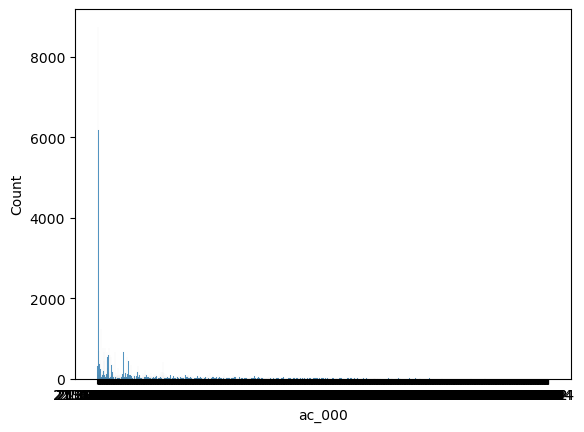

In [8]:
sns.histplot(air_systems_previous['ac_000'])

# Comparing NaN distributions

In [77]:
group_air_systems_previous = air_systems_previous.isna()

In [79]:
group_air_systems_previous['class'] = previous_years_class_columns

In [80]:
group_air_systems_previous.groupby(by='class').mean()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
neg,0.0,0.772169,0.048695,0.240949,0.036593,0.036593,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.011305,0.010237,0.009949,0.009949,0.065559,0.010153,0.009949,0.010153,0.009305,0.010153,0.009305,0.039763,0.009949,0.009949,0.009949,0.036593,0.03661,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.011593,0.010237,0.039797,0.039831,0.036644,0.036593,0.010153,0.010153,0.009305,0.009305,0.389322,0.461186,0.669119,0.744661,0.783983,0.807746,0.824322,0.833458,0.011542,0.002644,0.011,0.011,0.054746,0.008,0.039763,0.064847,0.011542,0.054712,0.010729,0.036627,0.240949,0.240949,0.240949,0.005559,0.005559,0.005559,0.158051,0.162492,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.011576,0.240949,0.03978,0.011,0.772169,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.011271,0.225017,0.225017,0.225017,0.225017,0.225017,0.225017,0.225017,0.225017,0.225017,0.036644,0.03978,0.059051,0.059051,0.059051,0.059017,0.059034,0.059034,0.059051,0.059068,0.011,0.03978,0.039814,0.039814,0.039814,0.039831,0.039831,0.039814,0.039814,0.039763,0.03978,0.039763,0.039763,0.059034,0.16822,0.158051,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.011288,0.03978,0.039763
pos,0.0,0.771000,0.462000,0.645000,0.341000,0.341000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.041000,0.042000,0.042000,0.532000,0.043000,0.042000,0.043000,0.040000,0.043000,0.040000,0.377000,0.042000,0.042000,0.042000,0.341000,0.34100,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.041000,0.377000,0.377000,0.341000,0.341000,0.043000,0.043000,0.040000,0.040000,0.064000,0.067000,0.071000,0.074000,0.078000,0.083000,0.087000,0.090000,0.045000,0.011000,0.042,0.042,0.027000,0.001,0.377000,0.530000,0.045000,0.027000,0.043000,0.341000,0.645000,0.645000,0.645000,0.010000,0.010000,0.010000,0.228000,0.290000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.645000,0.37700,0.042,0.771000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.532000,0.532000,0.532000,0.532000,0

In [84]:
aux = group_air_systems_previous.groupby(by='class').mean().copy()

In [92]:
aux = aux.transpose(
    
).reset_index(drop=True).melt()

In [93]:
aux.head(5)

,class,value
0,neg,0.000000
1,neg,0.772169
2,neg,0.048695
3,neg,0.240949
4,neg,0.036593


<Axes: xlabel='value', ylabel='Count'>

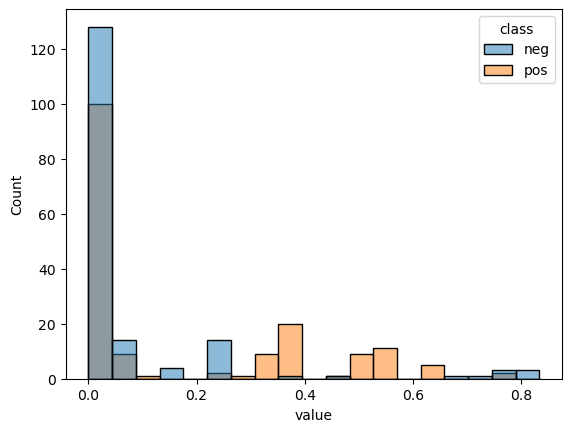

In [94]:
sns.histplot(data=aux, hue='class', x='value')

In [81]:
pd.DataFrame(group_air_systems_previous.mean(numeric_only=True)).T

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,0.77215,0.055583,0.247683,0.041667,0.041667,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.01075,0.010483,0.010483,0.073333,0.0107,0.010483,0.0107,0.009817,0.0107,0.009817,0.045383,0.010483,0.010483,0.010483,0.041667,0.041683,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.011467,0.01075,0.045417,0.04545,0.041717,0.041667,0.0107,0.0107,0.009817,0.009817,0.3839,0.454617,0.65915,0.733483,0.772217,0.795667,0.812033,0.821067,0.0121,0.002783,0.011517,0.011517,0.054283,0.007883,0.045383,0.0726,0.0121,0.05425,0.011267,0.0417,0.247683,0.247683,0.247683,0.005633,0.005633,0.005633,0.159217,0.164617,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.01145,0.247683,0.0454,0.011517,0.77215,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.01115,0.230133,0.230133,0.230133,0.230133,0.230133,0.230133,0.230133,0.230133,0.230133,0.041717,0.0454,0.0668,0.0668,0.0668,0.066767,0.066783,0.066783,0.0668,0.066817,0.011517,0.0454,0.045433,0.045433,0.045433,0.04545,0.04545,0.045433,0.045433,0.045383,0.0454,0.045383,0.045383,0.066783,0.17065,0.159217,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.011183,0.0454,0.045383


In [82]:
p_values = []

# Loop through each column in group_air_systems_previous
for col in group_air_systems_previous.columns:
        # Create a contingency table
        contingency_table = pd.crosstab(group_air_systems_previous[col], group_air_systems_previous['class'])

        # Perform Chi-Square Test Is it parametric?
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Store the p-value
        p_values.append(p)

p_values_air_systems_previous = pd.DataFrame({'Column': group_air_systems_previous.columns, 'p-value': p_values})



In [83]:
p_values_air_systems_previous.set_index('Column').sort_values(by='p-value', ascending=False).T

Column,aa_000,cr_000,ab_000,ci_000,cj_000,ck_000,az_000,ay_008,ay_007,ay_006,ay_003,ay_005,ay_004,az_002,ay_002,ay_001,az_001,az_005,az_003,az_004,ee_005,az_006,az_007,az_008,az_009,ee_004,ee_003,ee_002,ee_001,ee_000,ay_000,ay_009,ee_006,ee_009,ee_007,ee_008,cs_003,cs_006,cs_005,cs_004,cs_008,cs_002,cs_001,cs_000,cs_009,cs_007,ag_005,ag_004,ag_000,ag_003,ag_007,ag_006,ag_001,ag_008,ag_009,ag_002,cn_000,cn_001,cn_007,cn_002,cn_003,cn_004,cn_005,cn_006,cn_009,cn_008,ba_005,ba_009,ba_008,ba_007,ba_006,ba_004,ba_003,ba_002,ba_001,ba_000,by_000,cc_000,bx_000,bt_000,ed_000,cl_000,cq_000,dn_000,bv_000,bu_000,ah_000,bb_000,cd_000,cb_000,bs_000,bi_000,ao_000,aq_000,bj_000,aj_000,ai_000,am_0,as_000,at_000,au_000,bg_000,al_000,an_000,ap_000,bh_000,cm_000,ec_00,bk_000,dc_000,da_000,cz_000,cy_000,cx_000,cv_000,cu_000,ct_000,db_000,bl_000,ad_000,cf_000,cg_000,co_000,ch_000,ds_000,dt_000,du_000,dr_000,dq_000,dp_000,do_000,eg_000,ef_000,dy_000,eb_000,dx_000,dv_000,dm_000,dz_000,ea_000,bz_000,dl_000,dk_000,ac_000,ae_000,af_000,ak_000,ar_000,av_000,ax_000,bc_000,bd_000,be_000,bf_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,ca_000,ce_000,cp_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,class
p-value,1.0,0.960586,0.960586,0.099451,0.099451,0.099451,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.0848,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.043423,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.042688,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.037232,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.036915,0.021348,0.000166,0.000163,0.000003,2.656608e-09,2.656608e-09,3.202463e-19,3.202463e-19,3.202463e-19,3.202463e-19,3.585500e-20,3.585500e-20,3.838684e-21,3.378711e-21,3.378711e-21,7.907084e-22,7.907084e-22,7.907084e-22,7.907084e-22,2.695108e-22,2.695108e-22,2.695108e-22,2.695108e-22,2.695108e-22,2.695108e-22,6.427736e-23,6.427736e-23,6.427736e-23,6.427736e-23,6.427736e-23,6.657694e-27,9.465656e-34,2.149326e-97,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,2.197398e-115,1.083792e-135,6.666880e-189,6.666880e-189,6.666880e-189,6.666880e-189,6.666880e-189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Droping these columns would mean that we are giving up on information about our target variable. 

In [33]:
air_systems_previous['ag_001'].value_counts()

ag_001
0.0         58587
2.0             9
12.0            6
530916.0        5
15166.0         5
            ...  
214658.0        1
9264.0          1
8182.0          1
5084.0          1
267100.0        1
Name: count, Length: 617, dtype: int64

# Measuring long-tailed-ness

In [95]:
calculate_skewness_kurtosis(air_systems_previous)

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/3742618732.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results['Skewness'].append(skew(col_numeric.dropna(), nan_policy='omit'))
/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/3742618732.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results['Kurtosis'].append(kurtosis(col_numeric.dropna(), nan_policy='omit'))


,Column,Skewness,Kurtosis
0,aa_000,6.115600,48.293316
1,ab_000,28.082185,1223.027496
2,ac_000,1.784798,1.185502
3,ad_000,212.452345,45133.999393
4,ae_000,90.585889,10760.494731
5,af_000,51.670422,3818.192562
6,ag_000,153.383677,24990.166445
7,ag_001,76.074125,7289.892539
8,ag_002,37.025285,1772.442843
9,ag_003,23.787315,1116.867763


In [98]:
aux_kurtosis = calculate_skewness_kurtosis(air_systems_previous).sort_values(by='Kurtosis')

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/3742618732.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results['Skewness'].append(skew(col_numeric.dropna(), nan_policy='omit'))
/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/3742618732.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results['Kurtosis'].append(kurtosis(col_numeric.dropna(), nan_policy='omit'))


In [101]:
aux_kurtosis.reset_index(inplace=True, drop=True)

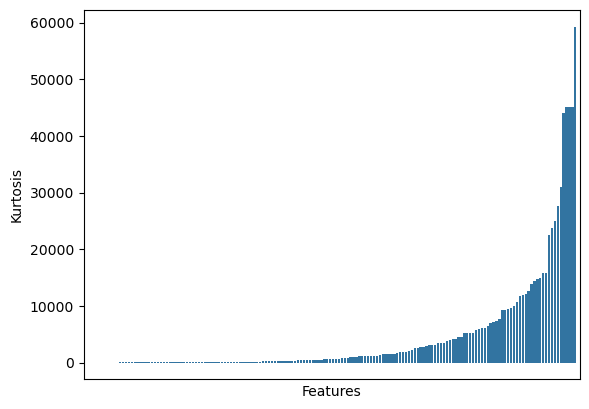

In [105]:
fig = plt.figure
sns.barplot(data=aux_kurtosis, x=aux_kurtosis.index, y='Kurtosis')
plt.xticks(ticks=[])
plt.xlabel('Features')
plt.show()

Droping columns with more than 20% NaNs

In [106]:
air_systems_previous.dropna(axis=1, thresh=(len(air_systems_previous)*0.8), inplace=True)

In [109]:
air_systems_previous.shape

(60000, 146)

Imputing nan's

In [ ]:
for col in air_systems_previous.columns:
    air_systems_previous[col].fillna(air_systems_previous[col].median(), inplace=True)

Add random noise column

In [ ]:
np.random.seed(42)  
air_systems_previous['random_noise'] = np.random.normal(loc=0.0, scale=1.0, size=len(air_systems_previous))

# Comparing Models

In [26]:
# Note: The dataset is very unbalanced, not adpating some of the algorithms to this fact may lead worse results.
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced"),
    "CatBoosting": CatBoostClassifier(silent=True),
    "Support Vector Machine": SVC(class_weight="balanced"),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "LightGBM": LGBMClassifier(is_unbalance=True, verbose=-1),
    "Neural Network": MLPClassifier(max_iter=10000),
}

In [3]:
f1_scorer = make_scorer(f1_score, average="binary", zero_division=0)

In [28]:
def evaluate_classifiers(clf, X, y, cv_splits=5):
    scores = cross_val_score(clf, X, y, cv=cv_splits, scoring=f1_scorer)
    return scores

Scale

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(air_systems_previous)

Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data, air_systems_previous['class'], test_size=0.2, random_state=42
)

In [ ]:
y_train = y_train.replace({'neg': 0, 'pos': 1})
y_test = y_test.replace({'neg': 0, 'pos': 1})

In [82]:
results = {}

for clf_name, clf in tqdm.tqdm(classifiers.items(), desc="Evaluating classifiers"):
    f1_scores = evaluate_classifiers(clf, scaled_data, y_train)
    results[clf_name] = f1_scores

Evaluating classifiers: 100%|██████████| 9/9 [06:37<00:00, 44.15s/it]


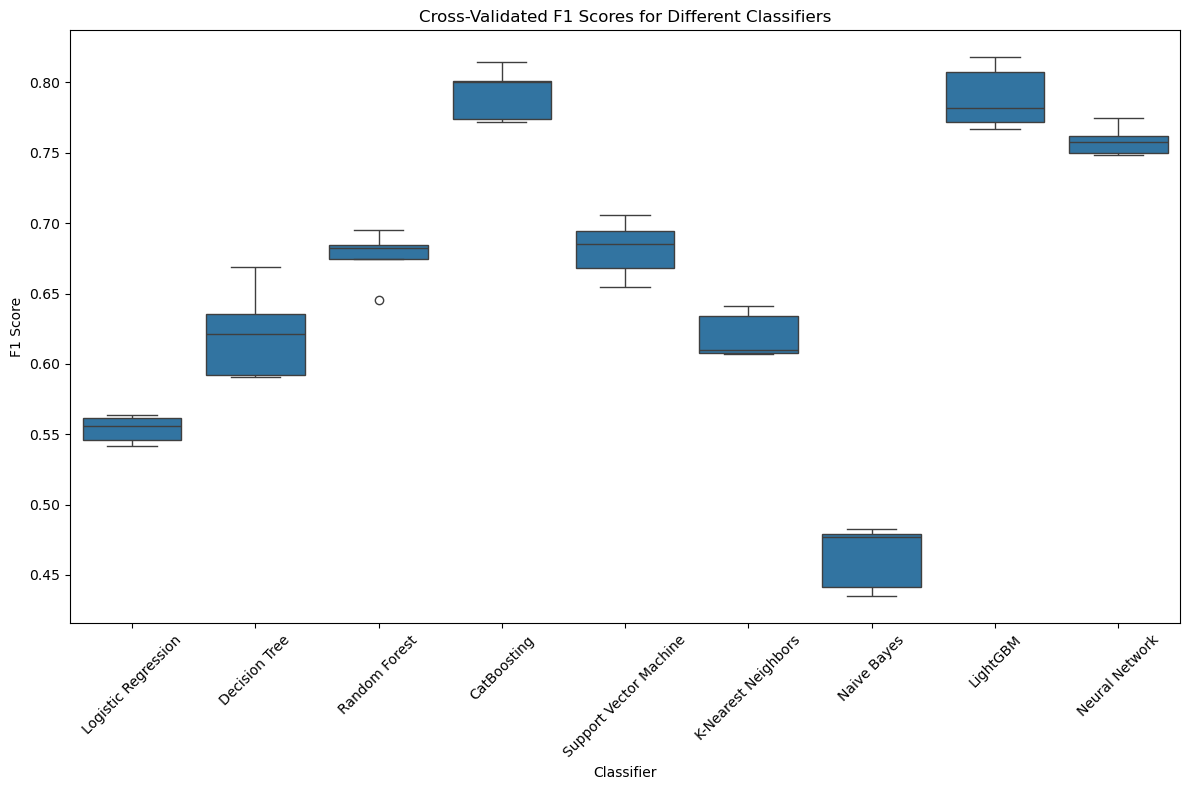

In [83]:
results_air_systems_previous = pd.DataFrame(results)
results_melted = results_air_systems_previous.melt(var_name="Classifier", value_name="F1 Score")

plt.figure(figsize=(12, 8))
sns.boxplot(x="Classifier", y="F1 Score", data=results_melted)
plt.title("Cross-Validated F1 Scores for Different Classifiers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Baseline CatBoostClassifier

In [182]:
cat_boost = CatBoostClassifier(silent=True, random_seed=42)
cat_boost.fit(X_train, y_train)

In [183]:
y_test.sum()

212

In [107]:
cat_boost.predict(X_test).sum()

173

In [185]:
f1_score(y_test, cat_boost.predict(X_test))


0.7780678851174935

In [186]:
result = permutation_importance(
    cat_boost,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=2,
    scoring=f1_scorer,
)

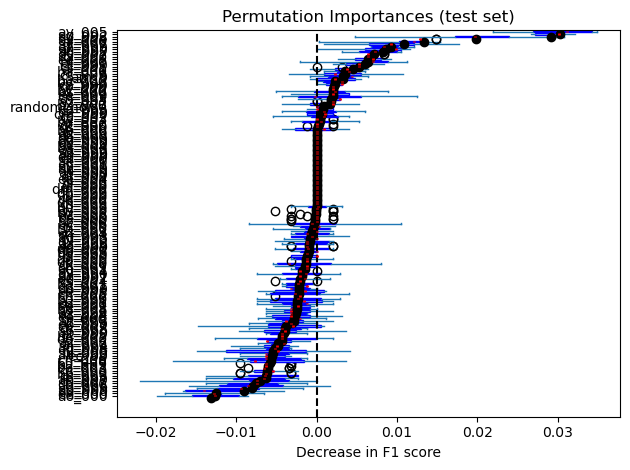

In [192]:
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=air_systems_previous.columns[sorted_importances_idx],
)

# Plot permutation importances
fig, ax = plt.subplots()
importances.plot.box(
    vert=False,
    whis=10,
    ax=ax,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red", linewidth=2),
    meanprops=dict(marker="o", markerfacecolor="black", markeredgecolor="black"),
)

# Adding a mean line
for i in range(importances.shape[1]):
    mean_value = importances.iloc[:, i].mean()
    ax.plot(mean_value, i, "o", color="black")
    
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in F1 score")
ax.figure.tight_layout()

plt.show()

In [193]:
importances['random_noise'].mean()

0.0008104873803307378

In [194]:
((importances.mean() > importances['random_noise'].mean()) == True).index

Index(['ao_000', 'ee_000', 'aq_000', 'ag_005', 'ag_006', 'cb_000', 'cs_007',
       'ah_000', 'cs_003', 'bb_000',
       ...
       'ay_002', 'ag_007', 'ac_000', 'aa_000', 'ay_007', 'ai_000', 'ay_000',
       'ay_008', 'ag_002', 'ay_005'],
      dtype='object', length=147)

In [195]:
important_features_series = pd.Series((importances.mean() > importances['random_noise'].mean()))
important_features_series[important_features_series == True].index


Index(['bx_000', 'az_007', 'cs_005', 'cn_002', 'ee_009', 'bs_000', 'bv_000',
       'dr_000', 'ca_000', 'by_000', 'ba_000', 'am_0', 'cs_006', 'ba_006',
       'al_000', 'cs_001', 'cc_000', 'bt_000', 'ee_005', 'cj_000', 'ay_002',
       'ag_007', 'ac_000', 'aa_000', 'ay_007', 'ai_000', 'ay_000', 'ay_008',
       'ag_002', 'ay_005'],
      dtype='object')

In [38]:
important_columns = ['bx_000', 'az_007', 'cs_005', 'cn_002', 'ee_009', 'bs_000', 'bv_000',
       'dr_000', 'ca_000', 'by_000', 'ba_000', 'am_0', 'cs_006', 'ba_006',
       'al_000', 'cs_001', 'cc_000', 'bt_000', 'ee_005', 'cj_000', 'ay_002',
       'ag_007', 'ac_000', 'aa_000', 'ay_007', 'ai_000', 'ay_000', 'ay_008',
       'ag_002', 'ay_005']

# Filtered Catboost

Olhar numero de estimadores. 

In [39]:
filtered_air_systems_previous = air_systems_previous[important_columns]

In [40]:
scaler = StandardScaler()
filtered_scaled_data = scaler.fit_transform(filtered_air_systems_previous)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    filtered_scaled_data, air_systems_previous['class'], test_size=0.2, random_state=42
)

KeyError: 'class'

In [ ]:
y_train = y_train.replace({'neg': 0, 'pos': 1})
y_test = y_test.replace({'neg': 0, 'pos': 1})

/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/3626633952.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'neg': 0, 'pos': 1})
/var/folders/25/8m9ycrtx2kv84b8szslr4jfc0000gp/T/ipykernel_20209/3626633952.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'neg': 0, 'pos': 1})


In [126]:
filtered_cat_boost = CatBoostClassifier(silent=True, random_seed=42, auto_class_weights='SqrtBalanced')
filtered_cat_boost.fit(X_train, y_train)

In [203]:
filtered_cat_boost.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
f1_score(y_test, filtered_cat_boost.predict(X_test))

0.7981220657276995

Text(0.5, 1.0, 'Confusion Matrix')

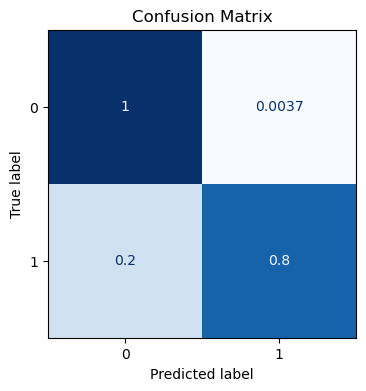

In [128]:
cm1 = confusion_matrix(y_test,filtered_cat_boost.predict(X_test), normalize='true')

fig, axes = plt.subplots(1, figsize=(10, 4))


disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap=plt.cm.Blues, ax=axes, colorbar=False)
axes.set_title("Confusion Matrix")

Text(0.5, 1.0, 'Confusion Matrix')

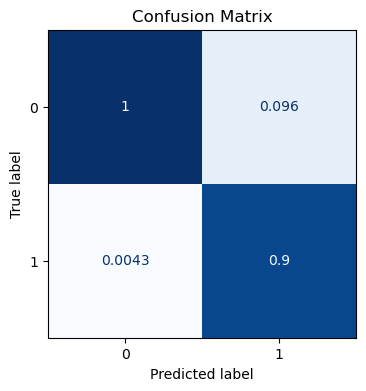

In [116]:
cm1 = confusion_matrix(y_test,filtered_cat_boost.predict(X_test), normalize='pred')

fig, axes = plt.subplots(1, figsize=(10, 4))


disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap=plt.cm.Blues, ax=axes, colorbar=False)
axes.set_title("Confusion Matrix")

In [117]:
from sklearn.metrics import classification_report

In [129]:
print(classification_report(y_test, filtered_cat_boost.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11788
           1       0.79      0.80      0.80       212

    accuracy                           0.99     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.99      0.99      0.99     12000



# Optuna

In [10]:
def objective(trial):
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
        "eval_metric": "Accuracy",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)
    
    # Initialize CatBoostClassifier with parameters
    model = CatBoostClassifier(**param, verbose=0)
    
    scoring = make_scorer(f1_score, average="binary")

    cv_score = cross_val_score(
        model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1
    )

    pruning_threshold = 0.50

    # Prune if the average F1 score is below the threshold
    if np.mean(cv_score) < pruning_threshold:
        raise optuna.exceptions.TrialPruned()
    
    return np.mean(cv_score)

In [11]:
# Define a callback to save checkpoints
class CheckpointCallback:
    def __init__(self, filename):
        self.filename = filename
    
    def __call__(self, study, trial):
        joblib.dump(study, self.filename)
        if trial.state == TrialState.COMPLETE:
            print(f"Trial {trial.number} completed with value: {trial.value}")

In [12]:
# Create a study and load from checkpoint if it exists
checkpoint_file = 'optuna_study.pkl'
try:
    study = joblib.load(checkpoint_file)
    print("Loaded checkpoint.")
except FileNotFoundError:
    study = optuna.create_study(direction="maximize", pruner=optuna.pruners.SuccessiveHalvingPruner())

# Optimize with checkpointing
checkpoint_callback = CheckpointCallback(checkpoint_file)
study.optimize(objective, n_trials=100, callbacks=[checkpoint_callback], n_jobs=-1, show_progress_bar=True)

# After the study
pruned_trials = [t for t in study.trials if t.state == TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == TrialState.COMPLETE]


[I 2024-07-09 10:06:42,762] A new study created in memory with name: no-name-892acc99-a554-4877-9eea-d3a21ffc0985
Best trial: 1. Best value: 0.718102:   1%|          | 1/100 [00:56<1:33:27, 56.65s/it]

[I 2024-07-09 10:07:39,433] Trial 1 finished with value: 0.7181020696886352 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.022852952968361286, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.7181020696886352.
Trial 1 completed with value: 0.7181020696886352


Best trial: 1. Best value: 0.718102:   2%|▏         | 2/100 [01:51<1:30:57, 55.69s/it]

[I 2024-07-09 10:08:34,384] Trial 6 finished with value: 0.6542057196181975 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.06471060533812317, 'depth': 1, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.7181020696886352.
Trial 6 completed with value: 0.6542057196181975


Best trial: 0. Best value: 0.785402:   3%|▎         | 3/100 [04:09<2:30:23, 93.03s/it]

[I 2024-07-09 10:10:51,882] Trial 0 finished with value: 0.7854020278498378 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09100054657702636, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.0068601222435025}. Best is trial 0 with value: 0.7854020278498378.
Trial 0 completed with value: 0.7854020278498378


Best trial: 7. Best value: 0.787572:   4%|▍         | 4/100 [05:14<2:11:35, 82.25s/it]

[I 2024-07-09 10:11:57,628] Trial 7 finished with value: 0.787571970198944 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09619970325868903, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.25076024344231285}. Best is trial 7 with value: 0.787571970198944.
Trial 7 completed with value: 0.787571970198944


Best trial: 7. Best value: 0.787572:   5%|▌         | 5/100 [05:36<1:35:26, 60.28s/it]

[I 2024-07-09 10:12:18,904] Trial 5 finished with value: 0.7122738438302305 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.03606815798947371, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 7.14954245906023}. Best is trial 7 with value: 0.787571970198944.
Trial 5 completed with value: 0.7122738438302305


Best trial: 7. Best value: 0.787572:   6%|▌         | 6/100 [06:43<1:38:09, 62.66s/it]

[I 2024-07-09 10:13:26,121] Trial 3 finished with value: 0.6619538708822981 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07325633972051236, 'depth': 1, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 7 with value: 0.787571970198944.
Trial 3 completed with value: 0.6619538708822981


Best trial: 7. Best value: 0.787572:   7%|▋         | 7/100 [06:59<1:13:23, 47.35s/it]

[I 2024-07-09 10:13:42,047] Trial 4 finished with value: 0.5530575541238657 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.010708005915331237, 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6197686916394557}. Best is trial 7 with value: 0.787571970198944.
Trial 4 completed with value: 0.5530575541238657


Best trial: 7. Best value: 0.787572:   8%|▊         | 8/100 [09:51<2:13:34, 87.12s/it]

[I 2024-07-09 10:16:34,256] Trial 8 finished with value: 0.7693665049313205 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.03462636998896673, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 7 with value: 0.787571970198944.
Trial 8 completed with value: 0.7693665049313205


Best trial: 7. Best value: 0.787572:   9%|▉         | 9/100 [10:30<1:49:28, 72.19s/it]

[I 2024-07-09 10:17:13,685] Trial 9 finished with value: 0.7269320933407268 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08148111440620183, 'depth': 2, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.301506433844429}. Best is trial 7 with value: 0.787571970198944.
Trial 9 completed with value: 0.7269320933407268


Best trial: 7. Best value: 0.787572:  10%|█         | 10/100 [11:33<1:43:58, 69.32s/it]

[I 2024-07-09 10:18:16,556] Trial 2 finished with value: 0.7816492151982017 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07272589821007672, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 5.370074236140542}. Best is trial 7 with value: 0.787571970198944.
Trial 2 completed with value: 0.7816492151982017


Best trial: 7. Best value: 0.787572:  11%|█         | 11/100 [11:35<1:12:02, 48.56s/it]

[I 2024-07-09 10:18:18,073] Trial 10 finished with value: 0.7128702101417903 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.019208105717710484, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.6122804196071713}. Best is trial 7 with value: 0.787571970198944.
Trial 10 completed with value: 0.7128702101417903


Best trial: 7. Best value: 0.787572:  12%|█▏        | 12/100 [12:11<1:05:37, 44.75s/it]

[I 2024-07-09 10:18:54,095] Trial 12 finished with value: 0.5285703339610432 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.011737214417755363, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.8685782772379995}. Best is trial 7 with value: 0.787571970198944.
Trial 12 completed with value: 0.5285703339610432


Best trial: 7. Best value: 0.787572:  13%|█▎        | 13/100 [12:35<55:57, 38.59s/it]  

[I 2024-07-09 10:19:18,524] Trial 11 finished with value: 0.7564581987706905 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.04660435958048973, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.008014484384946}. Best is trial 7 with value: 0.787571970198944.
Trial 11 completed with value: 0.7564581987706905


Best trial: 7. Best value: 0.787572:  14%|█▍        | 14/100 [13:00<49:31, 34.55s/it]

[I 2024-07-09 10:19:43,743] Trial 13 finished with value: 0.5942448882695143 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.012593287794572026, 'depth': 2, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.20576890681251553}. Best is trial 7 with value: 0.787571970198944.
Trial 13 completed with value: 0.5942448882695143


Best trial: 7. Best value: 0.787572:  15%|█▌        | 15/100 [13:38<50:09, 35.40s/it]

[I 2024-07-09 10:20:21,123] Trial 14 finished with value: 0.7050649189918325 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.018320691347398534, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 7 with value: 0.787571970198944.
Trial 14 completed with value: 0.7050649189918325


Best trial: 7. Best value: 0.787572:  16%|█▌        | 16/100 [14:05<46:15, 33.04s/it]

[I 2024-07-09 10:20:48,695] Trial 15 finished with value: 0.7351498582382686 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07616878406298377, 'depth': 2, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.20854215153029512}. Best is trial 7 with value: 0.787571970198944.
Trial 15 completed with value: 0.7351498582382686


Best trial: 7. Best value: 0.787572:  17%|█▋        | 17/100 [14:09<33:20, 24.10s/it]

[I 2024-07-09 10:20:51,991] Trial 16 finished with value: 0.7273952464624459 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.036985583911025785, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 8.742425683912629}. Best is trial 7 with value: 0.787571970198944.
Trial 16 completed with value: 0.7273952464624459


Best trial: 7. Best value: 0.787572:  18%|█▊        | 18/100 [14:18<26:46, 19.59s/it]

[I 2024-07-09 10:21:01,056] Trial 17 finished with value: 0.6907448454749341 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.019115863720660913, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.10831142163869222}. Best is trial 7 with value: 0.787571970198944.
Trial 17 completed with value: 0.6907448454749341


Best trial: 18. Best value: 0.787686:  19%|█▉        | 19/100 [14:31<23:42, 17.56s/it]

[I 2024-07-09 10:21:13,888] Trial 18 finished with value: 0.7876855374202429 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.053633914905256694, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.6171145787069969}. Best is trial 18 with value: 0.7876855374202429.
Trial 18 completed with value: 0.7876855374202429


Best trial: 18. Best value: 0.787686:  20%|██        | 20/100 [15:33<41:21, 31.02s/it]

[I 2024-07-09 10:22:16,290] Trial 19 finished with value: 0.7766886911513554 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.04435869785816784, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.14957964555118464}. Best is trial 18 with value: 0.7876855374202429.
Trial 19 completed with value: 0.7766886911513554


Best trial: 21. Best value: 0.789382:  21%|██        | 21/100 [16:03<40:26, 30.72s/it]

[I 2024-07-09 10:22:46,303] Trial 21 finished with value: 0.789382460948787 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09886014804015482, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.1685391004452325}. Best is trial 21 with value: 0.789382460948787.
Trial 21 completed with value: 0.789382460948787


Best trial: 21. Best value: 0.789382:  22%|██▏       | 22/100 [16:12<31:16, 24.05s/it]

[I 2024-07-09 10:22:54,814] Trial 20 finished with value: 0.7855729512129769 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08906447833528401, 'depth': 4, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.172020016450797}. Best is trial 21 with value: 0.789382460948787.
Trial 20 completed with value: 0.7855729512129769


Best trial: 21. Best value: 0.789382:  23%|██▎       | 23/100 [16:49<35:57, 28.03s/it]

[I 2024-07-09 10:23:32,083] Trial 22 finished with value: 0.7887480485669667 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09971311042537695, 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.007699653655215272}. Best is trial 21 with value: 0.789382460948787.
Trial 22 completed with value: 0.7887480485669667


Best trial: 23. Best value: 0.799022:  24%|██▍       | 24/100 [17:00<29:09, 23.02s/it]

[I 2024-07-09 10:23:43,428] Trial 23 finished with value: 0.7990224857566395 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09855359394264727, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.21834312142276788}. Best is trial 23 with value: 0.7990224857566395.
Trial 23 completed with value: 0.7990224857566395


Best trial: 23. Best value: 0.799022:  25%|██▌       | 25/100 [19:08<1:08:09, 54.53s/it]

[I 2024-07-09 10:25:51,464] Trial 24 finished with value: 0.7865312574025836 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09823878573955233, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.48705069967965364}. Best is trial 23 with value: 0.7990224857566395.
Trial 24 completed with value: 0.7865312574025836


Best trial: 23. Best value: 0.799022:  26%|██▌       | 26/100 [19:54<1:03:53, 51.80s/it]

[I 2024-07-09 10:26:36,903] Trial 26 finished with value: 0.7866063455706573 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.05938626874496418, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.042613761849058296}. Best is trial 23 with value: 0.7990224857566395.
Trial 26 completed with value: 0.7866063455706573


Best trial: 23. Best value: 0.799022:  27%|██▋       | 27/100 [20:16<52:07, 42.84s/it]  

[I 2024-07-09 10:26:58,846] Trial 27 finished with value: 0.790512385162679 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.056507436921852824, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.5617727048851933}. Best is trial 23 with value: 0.7990224857566395.
Trial 27 completed with value: 0.790512385162679


Best trial: 23. Best value: 0.799022:  28%|██▊       | 28/100 [20:28<40:22, 33.64s/it]

[I 2024-07-09 10:27:11,026] Trial 28 finished with value: 0.7809750566893424 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.05405081449157408, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.0995567242755837}. Best is trial 23 with value: 0.7990224857566395.
Trial 28 completed with value: 0.7809750566893424


Best trial: 23. Best value: 0.799022:  29%|██▉       | 29/100 [20:37<31:17, 26.45s/it]

[I 2024-07-09 10:27:20,693] Trial 25 finished with value: 0.7892771143813444 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0980323668203264, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.369639750257613}. Best is trial 23 with value: 0.7990224857566395.
Trial 25 completed with value: 0.7892771143813444


Best trial: 23. Best value: 0.799022:  30%|███       | 30/100 [20:43<23:27, 20.11s/it]

[I 2024-07-09 10:27:26,000] Trial 29 finished with value: 0.7844004909738562 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0584376648335517, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.325055932851079}. Best is trial 23 with value: 0.7990224857566395.
Trial 29 completed with value: 0.7844004909738562


Best trial: 23. Best value: 0.799022:  31%|███       | 31/100 [21:00<22:01, 19.15s/it]

[I 2024-07-09 10:27:42,930] Trial 30 finished with value: 0.7849186098690526 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.056505030950671595, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.306324203211742}. Best is trial 23 with value: 0.7990224857566395.
Trial 30 completed with value: 0.7849186098690526


Best trial: 23. Best value: 0.799022:  32%|███▏      | 32/100 [21:15<20:19, 17.93s/it]

[I 2024-07-09 10:27:58,008] Trial 31 finished with value: 0.7811397551872604 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.05872595889096341, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.519496272515298}. Best is trial 23 with value: 0.7990224857566395.
Trial 31 completed with value: 0.7811397551872604


Best trial: 23. Best value: 0.799022:  33%|███▎      | 33/100 [21:32<19:49, 17.76s/it]

[I 2024-07-09 10:28:15,358] Trial 32 finished with value: 0.7897070339650764 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0597069619983793, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.713001585868141}. Best is trial 23 with value: 0.7990224857566395.
Trial 32 completed with value: 0.7897070339650764


Best trial: 23. Best value: 0.799022:  34%|███▍      | 34/100 [21:52<20:10, 18.34s/it]

[I 2024-07-09 10:28:35,065] Trial 34 finished with value: 0.7383925298842631 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.02770749878339945, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.260903663798976}. Best is trial 23 with value: 0.7990224857566395.
Trial 34 completed with value: 0.7383925298842631


Best trial: 23. Best value: 0.799022:  35%|███▌      | 35/100 [21:53<14:18, 13.20s/it]

[I 2024-07-09 10:28:36,273] Trial 33 finished with value: 0.7937524710042887 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06039908625403722, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.6813609690667444}. Best is trial 23 with value: 0.7990224857566395.
Trial 33 completed with value: 0.7937524710042887


Best trial: 23. Best value: 0.799022:  36%|███▌      | 36/100 [22:16<17:11, 16.12s/it]

[I 2024-07-09 10:28:59,138] Trial 36 finished with value: 0.736166961567928 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.026980177037639167, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.468933847857059}. Best is trial 23 with value: 0.7990224857566395.
Trial 36 completed with value: 0.736166961567928


Best trial: 23. Best value: 0.799022:  37%|███▋      | 37/100 [22:23<14:06, 13.43s/it]

[I 2024-07-09 10:29:06,363] Trial 35 finished with value: 0.789821863959795 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06430376534452006, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.5340992941345233}. Best is trial 23 with value: 0.7990224857566395.
Trial 35 completed with value: 0.789821863959795


Best trial: 23. Best value: 0.799022:  38%|███▊      | 38/100 [22:32<12:29, 12.09s/it]

[I 2024-07-09 10:29:15,259] Trial 37 finished with value: 0.7340803451790762 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.02748214380665483, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 2.255479828223458}. Best is trial 23 with value: 0.7990224857566395.
Trial 37 completed with value: 0.7340803451790762


Best trial: 23. Best value: 0.799022:  39%|███▉      | 39/100 [23:10<20:08, 19.82s/it]

[I 2024-07-09 10:29:53,157] Trial 38 finished with value: 0.7950717379300452 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08292059992674336, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.7583668708904843}. Best is trial 23 with value: 0.7990224857566395.
Trial 38 completed with value: 0.7950717379300452


Best trial: 23. Best value: 0.799022:  40%|████      | 40/100 [23:37<21:56, 21.95s/it]

[I 2024-07-09 10:30:20,071] Trial 40 finished with value: 0.7285145964932441 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.02763648757254529, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.5241729259799683}. Best is trial 23 with value: 0.7990224857566395.
Trial 40 completed with value: 0.7285145964932441


Best trial: 23. Best value: 0.799022:  41%|████      | 41/100 [23:53<19:51, 20.19s/it]

[I 2024-07-09 10:30:36,151] Trial 39 finished with value: 0.7957407207952464 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08391683325438867, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.4836966285667352}. Best is trial 23 with value: 0.7990224857566395.
Trial 39 completed with value: 0.7957407207952464


Best trial: 23. Best value: 0.799022:  42%|████▏     | 42/100 [24:14<19:40, 20.35s/it]

[I 2024-07-09 10:30:56,873] Trial 41 finished with value: 0.788333596041902 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06975116388499719, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.3139695580577566}. Best is trial 23 with value: 0.7990224857566395.
Trial 41 completed with value: 0.788333596041902


Best trial: 23. Best value: 0.799022:  43%|████▎     | 43/100 [24:21<15:44, 16.57s/it]

[I 2024-07-09 10:31:04,667] Trial 42 finished with value: 0.7848710222471834 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.043154793984492554, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 23 with value: 0.7990224857566395.
Trial 42 completed with value: 0.7848710222471834


Best trial: 23. Best value: 0.799022:  44%|████▍     | 44/100 [25:05<23:03, 24.71s/it]

[I 2024-07-09 10:31:48,300] Trial 43 finished with value: 0.7929575347701355 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06774976570487572, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 23 with value: 0.7990224857566395.
Trial 43 completed with value: 0.7929575347701355


Best trial: 23. Best value: 0.799022:  45%|████▌     | 45/100 [25:55<29:33, 32.25s/it]

[I 2024-07-09 10:32:38,166] Trial 44 finished with value: 0.7946228975226 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06894698827717999, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 23 with value: 0.7990224857566395.
Trial 44 completed with value: 0.7946228975226


Best trial: 23. Best value: 0.799022:  46%|████▌     | 46/100 [26:09<24:07, 26.81s/it]

[I 2024-07-09 10:32:52,213] Trial 45 finished with value: 0.7844685407590888 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06778857536279514, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 23 with value: 0.7990224857566395.
Trial 45 completed with value: 0.7844685407590888


Best trial: 23. Best value: 0.799022:  47%|████▋     | 47/100 [27:26<37:03, 41.95s/it]

[I 2024-07-09 10:34:09,560] Trial 47 finished with value: 0.7874317897097922 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08146060745219309, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 23 with value: 0.7990224857566395.
Trial 47 completed with value: 0.7874317897097922


Best trial: 23. Best value: 0.799022:  48%|████▊     | 48/100 [27:29<26:14, 30.28s/it]

[I 2024-07-09 10:34:12,580] Trial 46 finished with value: 0.7898479384541411 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08252508194542506, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 23 with value: 0.7990224857566395.
Trial 46 completed with value: 0.7898479384541411


Best trial: 23. Best value: 0.799022:  49%|████▉     | 49/100 [27:53<24:00, 28.24s/it]

[I 2024-07-09 10:34:36,111] Trial 48 finished with value: 0.7914976204719026 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07097740531586766, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 23 with value: 0.7990224857566395.
Trial 48 completed with value: 0.7914976204719026


Best trial: 49. Best value: 0.800555:  50%|█████     | 50/100 [28:09<20:34, 24.69s/it]

[I 2024-07-09 10:34:52,527] Trial 49 finished with value: 0.8005554698904687 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08308907157123976, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 49 completed with value: 0.8005554698904687


Best trial: 49. Best value: 0.800555:  51%|█████     | 51/100 [28:41<21:55, 26.84s/it]

[I 2024-07-09 10:35:24,376] Trial 50 finished with value: 0.7965738812156595 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08433336291855156, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 50 completed with value: 0.7965738812156595


Best trial: 49. Best value: 0.800555:  52%|█████▏    | 52/100 [29:07<21:14, 26.54s/it]

[I 2024-07-09 10:35:50,213] Trial 51 finished with value: 0.7898767573304003 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08274981914904558, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 51 completed with value: 0.7898767573304003


Best trial: 49. Best value: 0.800555:  53%|█████▎    | 53/100 [29:27<19:21, 24.72s/it]

[I 2024-07-09 10:36:10,667] Trial 52 finished with value: 0.7898340561504356 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08683440712051267, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 52 completed with value: 0.7898340561504356


Best trial: 49. Best value: 0.800555:  54%|█████▍    | 54/100 [29:55<19:41, 25.68s/it]

[I 2024-07-09 10:36:38,574] Trial 53 finished with value: 0.7893202986234132 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0822559513040214, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 53 completed with value: 0.7893202986234132


Best trial: 49. Best value: 0.800555:  55%|█████▌    | 55/100 [30:20<19:02, 25.38s/it]

[I 2024-07-09 10:37:03,284] Trial 54 finished with value: 0.7934676405759772 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08493717775976181, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 54 completed with value: 0.7934676405759772


Best trial: 49. Best value: 0.800555:  56%|█████▌    | 56/100 [30:45<18:29, 25.23s/it]

[I 2024-07-09 10:37:28,118] Trial 55 finished with value: 0.7907150540193022 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08589392893530381, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 55 completed with value: 0.7907150540193022


Best trial: 49. Best value: 0.800555:  57%|█████▋    | 57/100 [31:15<19:04, 26.61s/it]

[I 2024-07-09 10:37:58,003] Trial 56 finished with value: 0.7852017896745578 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08621933840226569, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.10079296597556732}. Best is trial 49 with value: 0.8005554698904687.
Trial 56 completed with value: 0.7852017896745578


Best trial: 49. Best value: 0.800555:  58%|█████▊    | 58/100 [31:28<15:49, 22.61s/it]

[I 2024-07-09 10:38:11,255] Trial 57 finished with value: 0.7850807549586617 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08650468008664038, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 57 completed with value: 0.7850807549586617


Best trial: 49. Best value: 0.800555:  59%|█████▉    | 59/100 [31:56<16:31, 24.19s/it]

[I 2024-07-09 10:38:39,139] Trial 58 finished with value: 0.789131920378711 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08628985393041265, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 58 completed with value: 0.789131920378711


Best trial: 49. Best value: 0.800555:  60%|██████    | 60/100 [32:16<15:24, 23.11s/it]

[I 2024-07-09 10:38:59,719] Trial 59 finished with value: 0.7906282121001442 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08742412948915751, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 59 completed with value: 0.7906282121001442


Best trial: 49. Best value: 0.800555:  61%|██████    | 61/100 [32:38<14:37, 22.50s/it]

[I 2024-07-09 10:39:20,818] Trial 60 finished with value: 0.7888028749391575 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07570823812883262, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 60 completed with value: 0.7888028749391575


Best trial: 49. Best value: 0.800555:  62%|██████▏   | 62/100 [32:46<11:38, 18.39s/it]

[I 2024-07-09 10:39:29,587] Trial 61 finished with value: 0.791896367361523 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07615296939749903, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 61 completed with value: 0.791896367361523


Best trial: 49. Best value: 0.800555:  63%|██████▎   | 63/100 [32:55<09:27, 15.33s/it]

[I 2024-07-09 10:39:37,786] Trial 62 finished with value: 0.786020392432697 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07834678920644929, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.3563681348680703}. Best is trial 49 with value: 0.8005554698904687.
Trial 62 completed with value: 0.786020392432697


Best trial: 49. Best value: 0.800555:  64%|██████▍   | 64/100 [33:17<10:29, 17.48s/it]

[I 2024-07-09 10:40:00,312] Trial 63 finished with value: 0.7886005130046786 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07472167550025988, 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.886458643832292}. Best is trial 49 with value: 0.8005554698904687.
Trial 63 completed with value: 0.7886005130046786


Best trial: 49. Best value: 0.800555:  65%|██████▌   | 65/100 [33:27<08:54, 15.27s/it]

[I 2024-07-09 10:40:10,391] Trial 64 finished with value: 0.7876619933658253 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07776952417829607, 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 49 with value: 0.8005554698904687.
Trial 64 completed with value: 0.7876619933658253


Best trial: 49. Best value: 0.800555:  66%|██████▌   | 66/100 [33:52<10:17, 18.17s/it]

[I 2024-07-09 10:40:35,294] Trial 65 finished with value: 0.7931069969149211 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07347241894273464, 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8874930862054914}. Best is trial 49 with value: 0.8005554698904687.
Trial 65 completed with value: 0.7931069969149211


Best trial: 49. Best value: 0.800555:  67%|██████▋   | 67/100 [34:03<08:43, 15.87s/it]

[I 2024-07-09 10:40:45,829] Trial 66 finished with value: 0.7953105611923302 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07350057719513672, 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8930410875992414}. Best is trial 49 with value: 0.8005554698904687.
Trial 66 completed with value: 0.7953105611923302


Best trial: 49. Best value: 0.800555:  68%|██████▊   | 68/100 [34:55<14:15, 26.74s/it]

[I 2024-07-09 10:41:37,930] Trial 67 finished with value: 0.7937500139848663 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07551991002231108, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9977305393653527}. Best is trial 49 with value: 0.8005554698904687.
Trial 67 completed with value: 0.7937500139848663


Best trial: 49. Best value: 0.800555:  69%|██████▉   | 69/100 [35:15<12:52, 24.92s/it]

[I 2024-07-09 10:41:58,598] Trial 69 finished with value: 0.7865597286176367 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.04846411425619301, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.865518127056694}. Best is trial 49 with value: 0.8005554698904687.
Trial 69 completed with value: 0.7865597286176367


Best trial: 49. Best value: 0.800555:  70%|███████   | 70/100 [35:27<10:25, 20.86s/it]

[I 2024-07-09 10:42:09,944] Trial 68 finished with value: 0.786837878271107 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07495609814369576, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.928326546221015}. Best is trial 49 with value: 0.8005554698904687.
Trial 68 completed with value: 0.786837878271107


Best trial: 49. Best value: 0.800555:  70%|███████   | 70/100 [35:28<10:25, 20.86s/it]

[I 2024-07-09 10:42:11,292] Trial 70 finished with value: 0.7910768244982735 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.04808305967631911, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.8338294227703884}. Best is trial 49 with value: 0.8005554698904687.


Best trial: 49. Best value: 0.800555:  71%|███████   | 71/100 [35:28<07:16, 15.05s/it]

Trial 70 completed with value: 0.7910768244982735


Best trial: 49. Best value: 0.800555:  72%|███████▏  | 72/100 [35:55<08:41, 18.61s/it]

[I 2024-07-09 10:42:38,360] Trial 71 finished with value: 0.7874445637761093 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06448124271446139, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.2950933581172221}. Best is trial 49 with value: 0.8005554698904687.
Trial 71 completed with value: 0.7874445637761093


Best trial: 49. Best value: 0.800555:  73%|███████▎  | 73/100 [36:30<10:31, 23.40s/it]

[I 2024-07-09 10:43:12,988] Trial 72 finished with value: 0.7867913635552147 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.06357834524392829, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.4280231127597363}. Best is trial 49 with value: 0.8005554698904687.
Trial 72 completed with value: 0.7867913635552147


Best trial: 49. Best value: 0.800555:  74%|███████▍  | 74/100 [37:43<16:33, 38.22s/it]

[I 2024-07-09 10:44:25,680] Trial 73 finished with value: 0.7918709324640538 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09421537411685249, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.2975434649277977}. Best is trial 49 with value: 0.8005554698904687.
Trial 73 completed with value: 0.7918709324640538


Best trial: 49. Best value: 0.800555:  75%|███████▌  | 75/100 [46:10<1:14:33, 178.96s/it]

[I 2024-07-09 10:52:53,027] Trial 74 finished with value: 0.7959597968201058 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09378741942906577, 'depth': 11, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.39892467712186297}. Best is trial 49 with value: 0.8005554698904687.
Trial 74 completed with value: 0.7959597968201058


Best trial: 49. Best value: 0.800555:  76%|███████▌  | 76/100 [49:16<1:12:28, 181.20s/it]

[I 2024-07-09 10:55:59,526] Trial 76 finished with value: 0.7918286561969984 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09338453832719525, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.39603154540652147}. Best is trial 49 with value: 0.8005554698904687.
Trial 76 completed with value: 0.7918286561969984


Best trial: 49. Best value: 0.800555:  77%|███████▋  | 77/100 [51:12<1:01:54, 161.52s/it]

[I 2024-07-09 10:57:55,118] Trial 75 finished with value: 0.7923438579779183 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09164461615192683, 'depth': 11, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.33710344298921036}. Best is trial 49 with value: 0.8005554698904687.
Trial 75 completed with value: 0.7923438579779183


Best trial: 49. Best value: 0.800555:  78%|███████▊  | 78/100 [52:08<47:35, 129.78s/it]  

[I 2024-07-09 10:58:50,839] Trial 77 finished with value: 0.7952153743297983 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09354327334697887, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.41569259536233144}. Best is trial 49 with value: 0.8005554698904687.
Trial 77 completed with value: 0.7952153743297983


Best trial: 49. Best value: 0.800555:  78%|███████▊  | 78/100 [54:51<47:35, 129.78s/it]

[I 2024-07-09 11:01:33,781] Trial 78 finished with value: 0.7825880262518651 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09340991185811715, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.1725894054478363}. Best is trial 49 with value: 0.8005554698904687.


Best trial: 49. Best value: 0.800555:  79%|███████▉  | 79/100 [54:51<48:55, 139.78s/it]

Trial 78 completed with value: 0.7825880262518651


Best trial: 49. Best value: 0.800555:  80%|████████  | 80/100 [56:42<43:45, 131.28s/it]

[I 2024-07-09 11:03:25,332] Trial 79 finished with value: 0.7839333765373686 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09258549709900527, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.1993653947360232}. Best is trial 49 with value: 0.8005554698904687.
Trial 79 completed with value: 0.7839333765373686


Best trial: 49. Best value: 0.800555:  81%|████████  | 81/100 [57:56<36:06, 114.03s/it]

[I 2024-07-09 11:04:39,138] Trial 80 finished with value: 0.789568943599787 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09546903652697257, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 4.507798491751469}. Best is trial 49 with value: 0.8005554698904687.
Trial 80 completed with value: 0.789568943599787


Best trial: 49. Best value: 0.800555:  82%|████████▏ | 82/100 [1:00:07<35:46, 119.24s/it]

[I 2024-07-09 11:06:50,576] Trial 81 finished with value: 0.795076110080634 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0929441478887357, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 4.370644531557257}. Best is trial 49 with value: 0.8005554698904687.
Trial 81 completed with value: 0.795076110080634


Best trial: 49. Best value: 0.800555:  83%|████████▎ | 83/100 [1:00:44<26:47, 94.55s/it] 

[I 2024-07-09 11:07:27,510] Trial 82 finished with value: 0.7901950549076384 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0922368118526516, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.4100294119838904}. Best is trial 49 with value: 0.8005554698904687.
Trial 82 completed with value: 0.7901950549076384


Best trial: 49. Best value: 0.800555:  84%|████████▍ | 84/100 [1:01:14<20:00, 75.06s/it]

[I 2024-07-09 11:07:57,089] Trial 83 finished with value: 0.665494491833565 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.014023656869941514, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.46387216837113254}. Best is trial 49 with value: 0.8005554698904687.
Trial 83 completed with value: 0.665494491833565


Best trial: 49. Best value: 0.800555:  85%|████████▌ | 85/100 [1:01:46<15:30, 62.03s/it]

[I 2024-07-09 11:08:28,695] Trial 84 finished with value: 0.6848672403476699 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.01680704105211275, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.5150964092993079}. Best is trial 49 with value: 0.8005554698904687.
Trial 84 completed with value: 0.6848672403476699


Best trial: 49. Best value: 0.800555:  86%|████████▌ | 86/100 [1:03:44<18:25, 78.97s/it]

[I 2024-07-09 11:10:27,196] Trial 85 finished with value: 0.7916921559739185 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09337820282961228, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.56465855639691}. Best is trial 49 with value: 0.8005554698904687.
Trial 85 completed with value: 0.7916921559739185


Best trial: 49. Best value: 0.800555:  87%|████████▋ | 87/100 [1:04:39<15:31, 71.67s/it]

[I 2024-07-09 11:11:21,797] Trial 87 finished with value: 0.6709483814456898 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.015526498539927597, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.49265029747909245}. Best is trial 49 with value: 0.8005554698904687.
Trial 87 completed with value: 0.6709483814456898


Best trial: 49. Best value: 0.800555:  88%|████████▊ | 88/100 [1:05:19<12:29, 62.42s/it]

[I 2024-07-09 11:12:02,684] Trial 86 finished with value: 0.7935382445417668 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09267679326806715, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.4849642816949487}. Best is trial 49 with value: 0.8005554698904687.
Trial 86 completed with value: 0.7935382445417668


Best trial: 49. Best value: 0.800555:  89%|████████▉ | 89/100 [1:06:29<11:51, 64.65s/it]

[I 2024-07-09 11:13:12,569] Trial 88 finished with value: 0.7867459597581117 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09943021286978591, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.49466616787669354}. Best is trial 49 with value: 0.8005554698904687.
Trial 88 completed with value: 0.7867459597581117


Best trial: 49. Best value: 0.800555:  90%|█████████ | 90/100 [1:08:11<12:37, 75.75s/it]

[I 2024-07-09 11:14:54,177] Trial 89 finished with value: 0.786008552502145 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0969369224912534, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.48070913504999213}. Best is trial 49 with value: 0.8005554698904687.
Trial 89 completed with value: 0.786008552502145


Best trial: 49. Best value: 0.800555:  91%|█████████ | 91/100 [1:08:39<09:13, 61.48s/it]

[I 2024-07-09 11:15:22,372] Trial 90 finished with value: 0.7887620350905721 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09830602463882761, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.5379187873259244}. Best is trial 49 with value: 0.8005554698904687.
Trial 90 completed with value: 0.7887620350905721


Best trial: 49. Best value: 0.800555:  92%|█████████▏| 92/100 [1:09:59<08:55, 66.90s/it]

[I 2024-07-09 11:16:41,929] Trial 91 finished with value: 0.7936906172296458 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09933584548297826, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.24490548810775478}. Best is trial 49 with value: 0.8005554698904687.
Trial 91 completed with value: 0.7936906172296458


Best trial: 49. Best value: 0.800555:  93%|█████████▎| 93/100 [1:11:30<08:40, 74.32s/it]

[I 2024-07-09 11:18:13,566] Trial 92 finished with value: 0.7918712179926591 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08051519553413601, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.27101501824753854}. Best is trial 49 with value: 0.8005554698904687.
Trial 92 completed with value: 0.7918712179926591


Best trial: 49. Best value: 0.800555:  94%|█████████▍| 94/100 [1:11:59<06:04, 60.69s/it]

[I 2024-07-09 11:18:42,430] Trial 93 finished with value: 0.7886777474763916 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09943105981064117, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'subsample': 0.2577992312380633}. Best is trial 49 with value: 0.8005554698904687.
Trial 93 completed with value: 0.7886777474763916


Best trial: 49. Best value: 0.800555:  95%|█████████▌| 95/100 [1:13:34<05:54, 70.93s/it]

[I 2024-07-09 11:20:17,277] Trial 94 finished with value: 0.7855370465721465 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09810893435857686, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.48696390086256}. Best is trial 49 with value: 0.8005554698904687.
Trial 94 completed with value: 0.7855370465721465


Best trial: 49. Best value: 0.800555:  96%|█████████▌| 96/100 [1:14:15<04:07, 61.83s/it]

[I 2024-07-09 11:20:57,907] Trial 95 finished with value: 0.7766370951270115 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09851891163593939, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.285524486858557}. Best is trial 49 with value: 0.8005554698904687.
Trial 95 completed with value: 0.7766370951270115


Best trial: 49. Best value: 0.800555:  97%|█████████▋| 97/100 [1:14:57<02:48, 56.08s/it]

[I 2024-07-09 11:21:40,475] Trial 96 finished with value: 0.7747576868348081 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.07996596480586687, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 8.041821606457141}. Best is trial 49 with value: 0.8005554698904687.
Trial 96 completed with value: 0.7747576868348081


Best trial: 49. Best value: 0.800555:  98%|█████████▊| 98/100 [1:25:51<07:50, 235.30s/it]

[I 2024-07-09 11:32:34,042] Trial 97 finished with value: 0.7694952152048792 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08097300465645753, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.290136198652043}. Best is trial 49 with value: 0.8005554698904687.
Trial 97 completed with value: 0.7694952152048792


Best trial: 49. Best value: 0.800555:  99%|█████████▉| 99/100 [1:31:00<04:17, 257.36s/it]

[I 2024-07-09 11:37:42,787] Trial 99 finished with value: 0.7842423900777916 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08014357522195296, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.551880057924042}. Best is trial 49 with value: 0.8005554698904687.
Trial 99 completed with value: 0.7842423900777916


Best trial: 49. Best value: 0.800555: 100%|██████████| 100/100 [1:32:09<00:00, 55.29s/it] 

[I 2024-07-09 11:38:52,029] Trial 98 finished with value: 0.7843216145348602 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08117586277912207, 'depth': 12, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 6.219437556164323}. Best is trial 49 with value: 0.8005554698904687.
Trial 98 completed with value: 0.7843216145348602


# Precision Recall Curve

In [64]:
y_pred_prob = filtered_cat_boost.predict_proba(X_test)

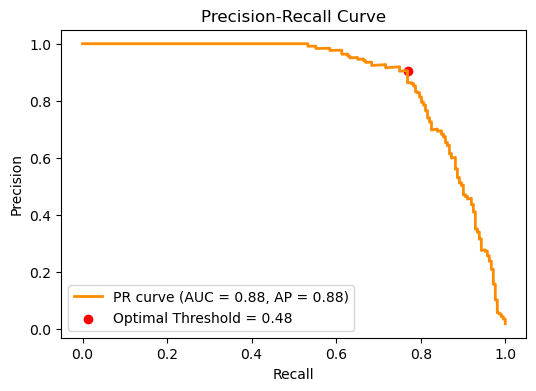

Optimal Threshold: 0.48318955783701895


In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:, 1])

pr_auc = auc(recall, precision)
average_precision = average_precision_score(y_test, y_pred_prob[:, 1])

# Find the optimal point
fscore = (2 * precision * recall) / (precision + recall)
optimal_idx = np.argmax(fscore)
optimal_threshold = thresholds[optimal_idx]

plt.figure(figsize=(6, 4))
plt.plot(
    recall,
    precision,
    color="darkorange",
    lw=2,
    label=f"PR curve (AUC = {pr_auc:.2f}, AP = {average_precision:.2f})",
)
plt.scatter(
    recall[optimal_idx],
    precision[optimal_idx],
    marker="o",
    color="red",
    label=f"Optimal Threshold = {optimal_threshold:.2f}",
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

print(f"Optimal Threshold: {optimal_threshold}")

# Confusion Matrix

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred_adjusted)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(cmap=plt.cm.Blues, ax=axes[0], colorbar=False)
axes[0].set_title("Confusion Matrix")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(cmap=plt.cm.Blues, ax=axes[1], colorbar=False)
axes[1].set_title("Adjusted Confusion Matrix")

plt.tight_layout()
plt.show()


# Model Calibration

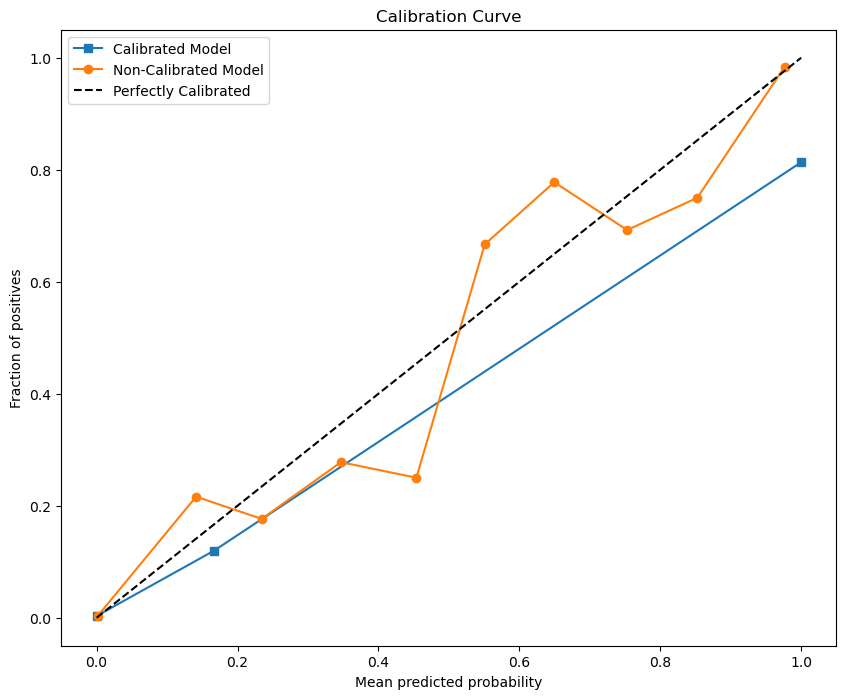

In [121]:
platt_calibrated = CalibratedClassifierCV(filtered_cat_boost, method='isotonic', cv="prefit")
platt_calibrated.fit(X_train, y_train)

calibrated_probabilities = platt_calibrated.predict_proba(X_test)
fraction_of_positives_cal, mean_predicted_value_cal = calibration_curve(
    y_test, calibrated_probabilities[:, 1], n_bins=10
)
fraction_of_positives_non_cal, mean_predicted_value_non_cal = calibration_curve(
    y_test, filtered_cat_boost.predict_proba(X_test)[:, 1], n_bins=10
)

plt.figure(figsize=(10, 8))
plt.plot(
    mean_predicted_value_cal, fraction_of_positives_cal, "s-", label="Calibrated Model"
)
plt.plot(
    mean_predicted_value_non_cal,
    fraction_of_positives_non_cal,
    "o-",
    label="Non-Calibrated Model",
)
plt.plot([0, 1], [0, 1], "k--", label="Perfectly Calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curve")
plt.legend()
plt.show()


# Shap Values

Shape of shap_values: (12000, 30)
Shape of X_test: (12000, 30)


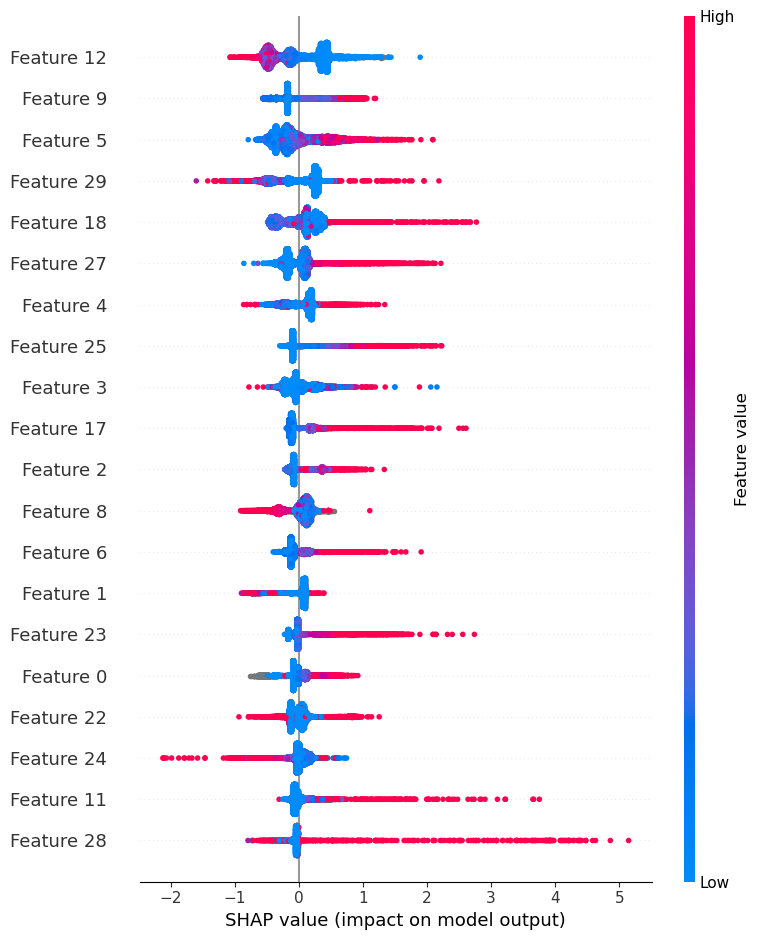

In [47]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(filtered_cat_boost)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Print the shapes for debugging
if isinstance(shap_values, list):
    print(f"Shapes of shap_values list: {[arr.shape for arr in shap_values]}")
else:
    print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")
# # Plot summary of SHAP values for the test set
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.dependence_plot()